In [1]:
from instruction_reader import InstructionReader
from parse import parse_sexprs
import random

import tensorflow.compat.v1 as tf
import os
import pdb
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

from tf_optimizer import TfOptimizer
from parse import parse_sexprs
from instruction_reader import InstructionReader

from util_graph_gen import *
from graph_generator import *


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.logging.set_verbosity(tf.logging.ERROR)
tf.disable_v2_behavior()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import argparse
import pdb

from builder import build
from util import DEFAULTS
import copy

In [2]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def'),

args = parser.parse_args()
args = vars(args)


In [3]:
args['enforce_goals'] = True

In [4]:
from importlib import reload

import util_graph_gen
reload(util_graph_gen)
from util_graph_gen import *

import graph_generator
reload(graph_generator)
from graph_generator import *

Processing instructions...:   0%|          | 0/1 [00:00<?, ?it/s]

Processing instructions...: 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

Generate step: 1, attemp: 1
(param L1 line )
generated line: (param L1 line )
INPUT INSTRUCTIONS:
parameterize L1 line


Found 1 models


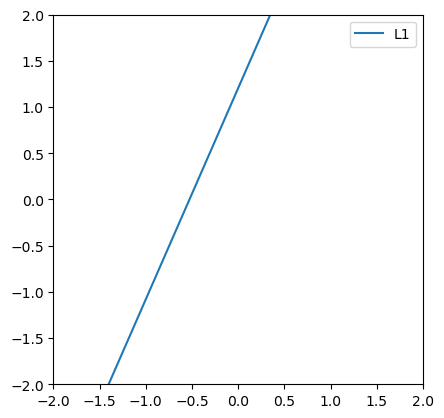

Processing instructions...:  33%|███▎      | 1/3 [00:00<00:00,  8.08it/s]


######################## Lines drawn above ########################
['(param L1 line )']

Generate step: 2, attemp: 1
(assert (tangent-cc P1))
generated line: (assert (tangent-cc P1))
Generate step: 2, attemp: 2
(define L2 line (isotomic P1 P2 P3 P4))
generated line: (define L2 line (isotomic P1 P2 P3 P4))
Generate step: 2, attemp: 3
(assert (circumcenter P1 P2 P3))
generated line: (assert (circumcenter P1 P2 P3))
Generate step: 2, attemp: 4
(assert (midp P1 P2))
generated line: (assert (midp P1 P2))
Generate step: 2, attemp: 5
(param (P1 P2 P3) (iso-tri P1) )
generated line: (param (P1 P2 P3) (iso-tri P1) )
Generate step: 3, attemp: 1
(define P4 point (inter-ll))
generated line: (define P4 point (inter-ll))
Generate step: 3, attemp: 2
(assert (same-side P2 P1))
generated line: (assert (same-side P2 P1))
Generate step: 3, attemp: 3
(assert (cong P1 P2 P3 P4))
generated line: (assert (cong P1 P2 P3 P4))
Generate step: 3, attemp: 4
(assert (para))
generated line: (assert (para))
Generat

Processing instructions...: 100%|██████████| 3/3 [00:00<00:00, 20.02it/s]


Generate step: 2, attemp: 1
(assert (incenter P1 P2 P3))
generated line: (assert (incenter P1 P2 P3))
Generate step: 2, attemp: 2
(assert (centroid P1 P2 P3))
generated line: (assert (centroid P1 P2 P3))
Generate step: 2, attemp: 3
(param P1 point (on-line P1))
generated line: (param P1 point (on-line P1))
Generate step: 2, attemp: 4
(param C1 circle (through P1))
generated line: (param C1 circle (through P1))
Generate step: 2, attemp: 5
(assert (on-seg P1 P2))
generated line: (assert (on-seg P1 P2))
Generate step: 2, attemp: 6
(param P1 point (on-ray-opp P1 P2))
generated line: (param P1 point (on-ray-opp P1 P2))
Generate step: 2, attemp: 7
(define C1 circle (c3 P1 P2 P3))
generated line: (define C1 circle (c3 P1 P2 P3))
Generate step: 2, attemp: 8
(define C1 circle (circumcircle P1 P2 P3))
generated line: (define C1 circle (circumcircle P1 P2 P3))
Generate step: 2, attemp: 9
(define L2 line (isogonal P1 P2 P3 P4))
generated line: (define L2 line (isogonal P1 P2 P3 P4))
Generate step:

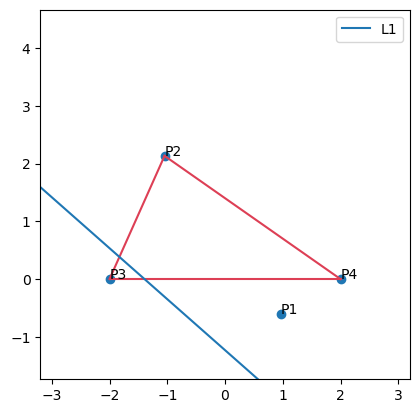

Processing instructions...:   0%|          | 0/6 [00:00<?, ?it/s]


######################## Lines drawn above ########################
['(param L1 line )', '(param P1 point )', '(param (P2 P3 P4) acute-tri )']

Generate step: 4, attemp: 1
(define L2 line (perp-at P4))
generated line: (define L2 line (perp-at P4))
Generate step: 4, attemp: 2
(assert (same-side P2 P3))
generated line: (assert (same-side P2 P3))
Generate step: 4, attemp: 3
(assert )
generated line: (assert )
Generate step: 4, attemp: 4
(assert (foot P3))
generated line: (assert (foot P3))
Generate step: 4, attemp: 5
(assert )
generated line: (assert )
Generate step: 4, attemp: 6
(param L2 line (through P3))
generated line: (param L2 line (through P3))
Generate step: 5, attemp: 1
(define P5 point (amidp-same P4 P1 P2))
generated line: (define P5 point (amidp-same P4 P1 P2))
Generate step: 6, attemp: 1
(assert (same-side P1 P2))
generated line: (assert (same-side P1 P2))
Generate step: 6, attemp: 2
(define L3 line (line P5 P4))
generated line: (define L3 line (line P5 P4))
INPUT INSTRUCTI

Processing instructions...: 100%|██████████| 6/6 [00:01<00:00,  4.88it/s]




Found 1 models


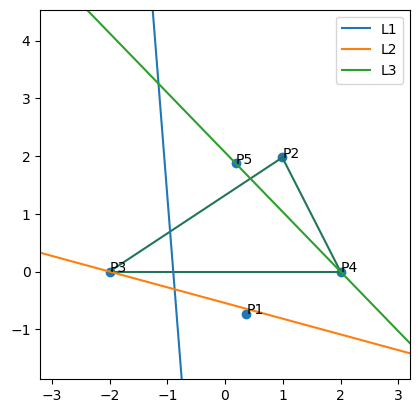


######################## Lines drawn above ########################
['(param L1 line )', '(param P1 point )', '(param (P2 P3 P4) acute-tri )', '(param L2 line (through P3))', '(define P5 point (amidp-same P4 P1 P2))', '(define L3 line (line P5 P4))']

Generate step: 7, attemp: 1
(param P6 point (on-minor-arc P1 P2 P3))
generated line: (param P6 point (on-minor-arc P1 P2 P3))
Generate step: 7, attemp: 2
(define L4 line (line P5 P1))
generated line: (define L4 line (line P5 P1))


In [9]:
num_steps = 6
readers, figs = generate_graph(args, num_steps)

In [10]:
for item in readers:
    print(item)

    for pr_item in item.problem_lines:
        print(pr_item)

(param L1 line )
(param L1 line )
(param P1 point )
(param (P2 P3 P4) acute-tri )
(param L1 line )
(param P1 point )
(param (P2 P3 P4) acute-tri )
(param L2 line (through P3))
(define P5 point (amidp-same P4 P1 P2))
(define L3 line (line P5 P4))


Processing instructions...:  20%|██        | 1/5 [00:00<00:00,  8.27it/s]

INPUT INSTRUCTIONS:
parameterize L1 line
parameterize P1 coords
sample (P2 P3 P4) acute-tri ()
parameterize L2 (through-l P3)
define P5 ((amidp-same P4 P1 P2))


Processing instructions...: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]




Found 1 models


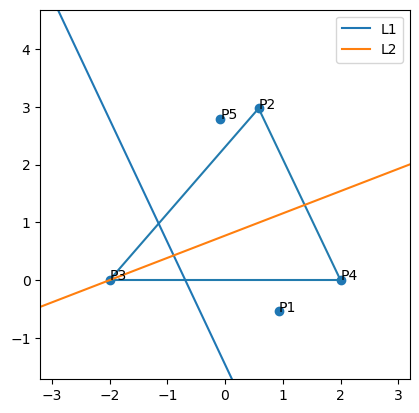

In [12]:
#lines = ['(param (P1 P2 P3) (right-tri P1) )']
lines = readers[-1].problem_lines[:5]

reader = InstructionReader(lines)
fig = solve_draw(args, reader)